In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as units
import copy

In [2]:
%autoreload 2
import dualpy as dp

In [3]:
def func(x,p):
    # result = (x+p)**0.5 + (x-p)**3 + np.sin(units.rad*x**2)
    result = (x+p)**2
    return result / result.unit

In [4]:
x_true = np.arange(1,11) * units.dimensionless_unscaled
p = 1.5*units.dimensionless_unscaled
p_true = copy.deepcopy(p)
p = dp.seed(p, "p")

In [5]:
y_target = func(x_true, p_true)
y_target = dp.seed(y_target, "y_target")

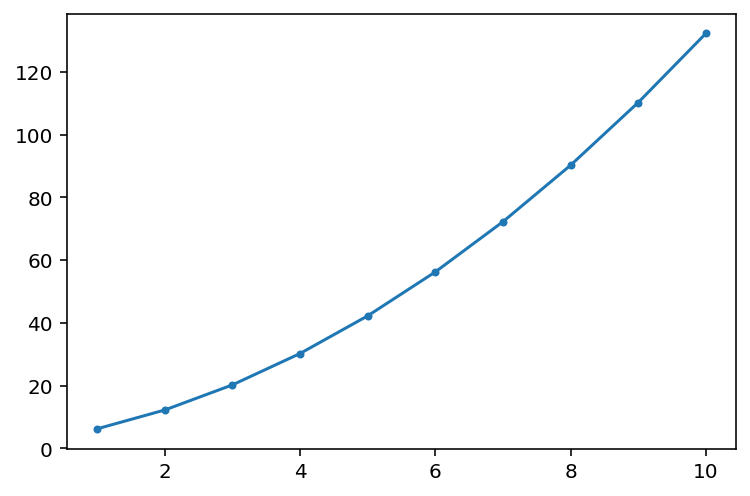

In [6]:
plt.plot(x_true, y_target, marker='.')

In [7]:
x0 = x_true*0.0 + 1.0
# x0 = x_true*0.0+1.0*units.dimensionless_unscaled
def solver(p, y_target):
    return dp.multi_newton_raphson(
        x0, func, args=[p], y=y_target, max_iter=None, 
        dy_tolerance=1e-6*units.dimensionless_unscaled)

In [8]:
x_hat_a, x_hat_n = dp.compute_numeric_jacobians(solver, args=(p, y_target))

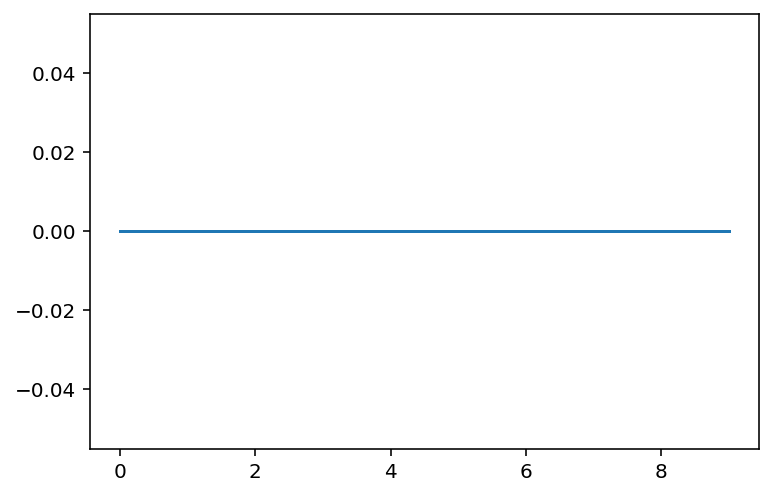

In [9]:
plt.plot(x_hat_a - x_true)

In [10]:
j_pa = x_hat_a.jacobians["p"].todensearray()
j_pn = x_hat_n.jacobians["p"].todensearray()
j_ya = x_hat_a.jacobians["y_target"].todensearray()
j_yn = x_hat_n.jacobians["y_target"].todensearray()
# dj_pa = np.diag(j_pa)
# dj_pn = np.diag(j_pn)
dj_ya = np.diag(j_ya)
dj_yn = np.diag(j_yn)

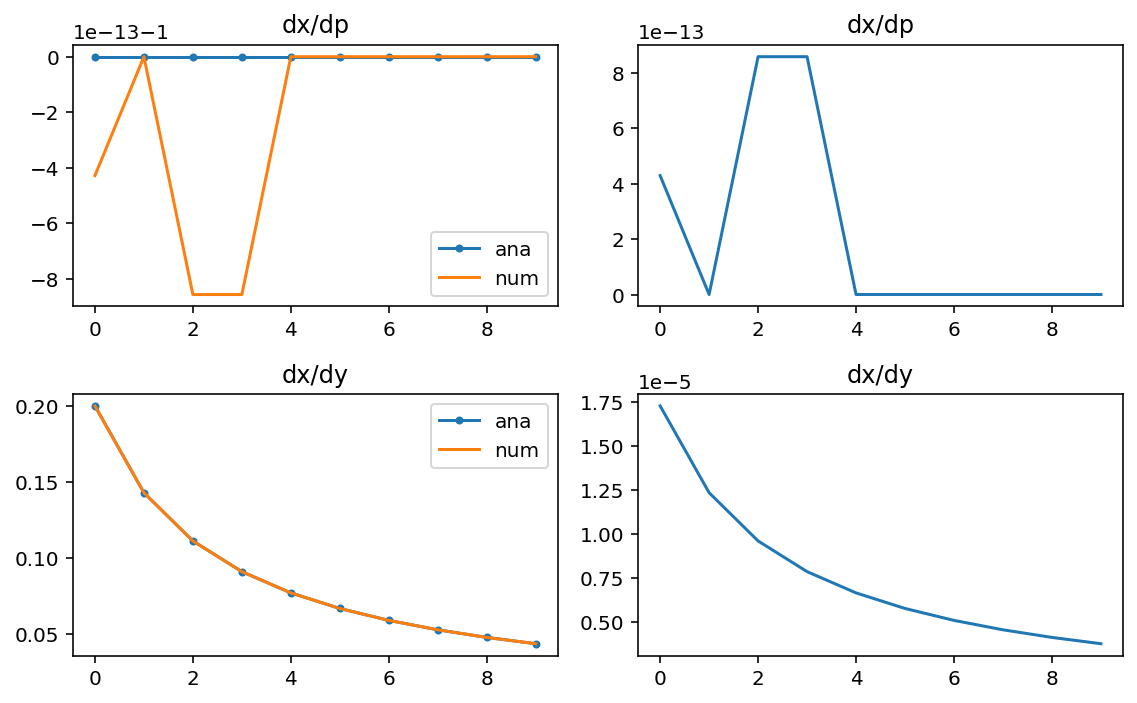

In [11]:
fig, axes = plt.subplots(2,2, figsize=[8,5])
for row, ja, jn, title in zip(axes, [j_pa, dj_ya], [j_pn, dj_yn], ["dx/dp", "dx/dy"]):
    row[0].plot(ja, marker='.', label="ana")
    row[0].plot(jn, label="num")
    row[0].legend()
    row[1].plot(ja-jn)
    for i in range(2):
        row[i].set_title(title)
fig.tight_layout()

In [12]:
print(j_pa)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [13]:
print(x_hat_a)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [14]:
x = dp.dlarray(1.0*units.m)
# x = 1.0*units.m
print(x, x.shape, x.size, x.ndim)
ii = tuple()
print(ii, type(ii))
x[ii] = x[ii] + 0.1*units.m
# x[ii] += 0.1*units.m
print(x)

1.0 m () 1 0
() <class 'tuple'>
1.1 m
